In [44]:
import numpy as np
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error  # evaluation metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns  #data visualization library

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("activity_may_summary.csv", decimal='.')
df = df.drop(columns=["Date"])
df.head(5)

,calories,steps,distance,floors,minutesSedentary,minutesLightlyActive,minutesFairlyActive,minutesVeryActive,activityCalories
0,1793,9424,6.06905,45,1204,236,0,0,742
1,1752,6931,4.46356,25,1202,238,0,0,694
2,1824,11370,7.32228,21,1207,218,11,4,786
3,1910,9781,6.29896,20,1139,283,17,1,905
4,2009,12924,8.25988,36,1058,230,48,16,1007


In [4]:
# This dataset is for training purpose, and was obtained from Kaggle. 
# Therefore, some columns are missing (floors, activity calories)

df_2 = pd.read_csv("train_dataset.csv", decimal='.', sep=";")
df_2 = df_2.drop(columns=["Date"])
df_2.head(5)

,calories,steps,distance,minutesSedentary,minutesLightlyActive,minutesFairlyActive,minutesVeryActive
0,1985,13162,8.50,728,328,13,25
1,1797,10735,6.97,776,217,19,21
2,1776,10460,6.74,1218,181,11,30
3,1745,9762,6.28,726,209,34,29
4,1863,12669,8.16,773,221,10,36


In [5]:
step_df = pd.read_csv('steps_data.csv')

heartrate_df = pd.read_csv("heart_rate_may.csv")

calories_df = pd.read_csv("calories_data.csv")

Text(0, 0.5, 'Step counted')

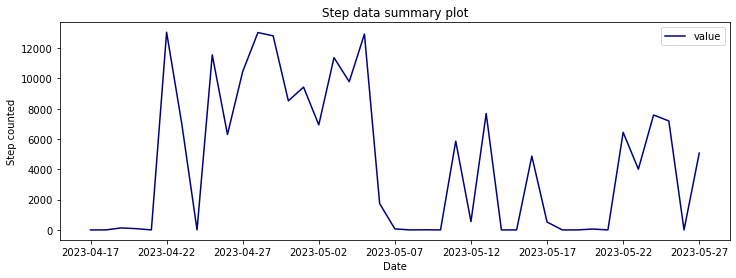

In [6]:
ax = step_df.plot(x="dateTime", colormap="jet", figsize=(12, 4), title="Step data summary plot")
ax.set_xlabel("Date")
ax.set_ylabel("Step counted")

Text(0, 0.5, 'Heart rate')

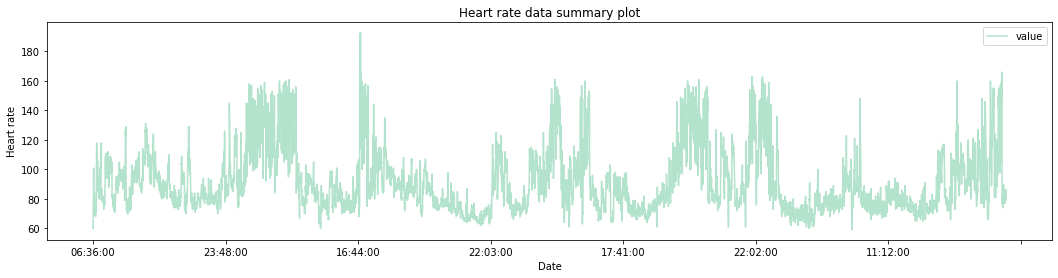

In [7]:
ax = heartrate_df.plot(x="time", colormap="Pastel2", figsize=(18, 4), title="Heart rate data summary plot")
ax.set_xlabel("Date")
ax.set_ylabel("Heart rate")

Text(0, 0.5, 'Step counted')

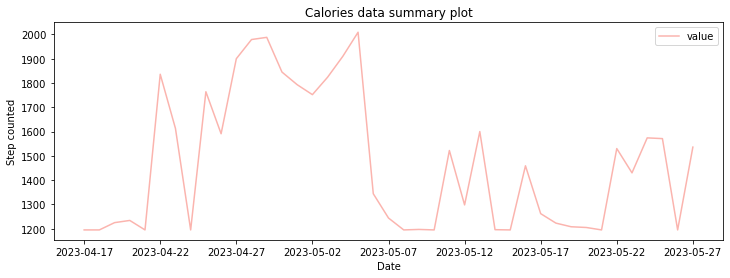

In [8]:
ax = calories_df.plot(x="dateTime", colormap="Pastel1", figsize=(12, 4), title="Calories data summary plot")
ax.set_xlabel("Date")
ax.set_ylabel("Step counted")

# Use Linear Regression model


In [31]:
X = df_2.drop(columns=['distance','minutesSedentary', 'minutesLightlyActive', 'minutesFairlyActive', 'minutesVeryActive'],axis=0)
y = df_2["distance"].to_numpy().reshape(-1,1)
print(X.head())

   calories  steps
0      1985  13162
1      1797  10735
2      1776  10460
3      1745   9762
4      1863  12669


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', MSE)


Mean squared error:  0.30086774360922813


In [13]:
X_may = df.drop(columns=['floors', 'activityCalories', 'distance','minutesSedentary', 'minutesLightlyActive', 'minutesFairlyActive', 'minutesVeryActive'],axis=0)
y_may = df["distance"].to_numpy().reshape(-1,1)

y_may_pred = clf.predict(X_may)
accuracy_may = clf.score(X_may,y_may)
print('Accuracy of the model with most recent dataset:',accuracy_may*100,'%')

Accuracy of the model with most recent dataset: 96.81345724646617 %


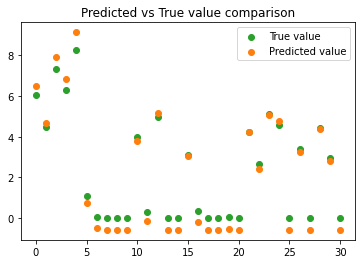

In [14]:
plt.scatter(range(len(y_may)), y_may, color='tab:green', label="True value")
plt.scatter(range(len(y_may_pred)), y_may_pred, color='tab:orange', label="Predicted value")
plt.title("Predicted vs True value comparison")
plt.legend()
plt.show()

# Use Logistic Regresison model

In [38]:
X_log = df_2.drop(columns=['calories','minutesSedentary', 'minutesLightlyActive', 'minutesFairlyActive', 'minutesVeryActive'],axis=0)
y_log = df_2["calories"].values.ravel()
print(X_log.head())
X_perf, X_test, y_perf, y_test = train_test_split(X_tree, y_tree, test_size = 0.2, random_state = 42)

   steps  distance
0  13162      8.50
1  10735      6.97
2  10460      6.74
3   9762      6.28
4  12669      8.16


In [48]:
log_model = LogisticRegression(max_iter=150)
log_model.fit(X_perf, y_perf)

y_pred = log_model.predict(X_perf)
accuracy = accuracy_score(y_perf, y_pred)
print('Training error: ', accuracy*100)

Training error:  1.4627659574468086


In [50]:
y_test_pred = log_model.predict(X_test)
accuracyscore = accuracy_score(y_test, y_test_pred)
print("Training error: ", accuracyscore*100)


Training error:  1.5957446808510638


In [56]:
X_may_log = df.drop(columns=['floors', 'activityCalories', 'calories','minutesSedentary', 'minutesLightlyActive', 'minutesFairlyActive', 'minutesVeryActive'],axis=0)
y_may_log = df["calories"].values.ravel()
y_log_pred = log_model.predict(X_may_log)
print(y_log_pred)
print("*****")
print(y_may_log)

[2690 2690 2690 2690 2690 2690 2690 1980 2105 1980 2690 2690 2690 1980
 1980 2690 2690 1980 1980 2690 1980 2690 2690 2690 2690 1980 2690 1980
 2690 2690 1980]
*****
[1793 1752 1824 1910 2009 1344 1244 1195 1197 1195 1522 1298 1600 1196
 1195 1459 1262 1223 1208 1205 1195 1530 1430 1574 1571 1195 1536 1195
 1558 1432 1195]


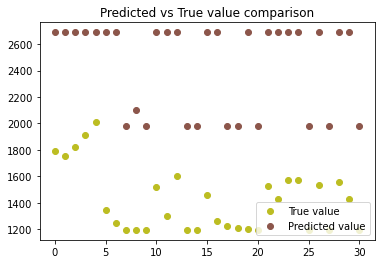

In [59]:
plt.scatter(range(len(y_may_log)), y_may_log, color='tab:olive', label="True value")
plt.scatter(range(len(y_log_pred)), y_log_pred, color='tab:brown', label="Predicted value")
plt.title("Predicted vs True value comparison")
plt.legend()
plt.show()